In [34]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

In [35]:
pTdata = np.array(genfromtxt('ptl_300.dat'))
langledata = np.array(genfromtxt('langle_300.dat'))
dphidata = np.array(genfromtxt('dphi_300.dat'))

In [38]:
crossSection=0.0119
lumi=10
Nevents=100000
weighted=np.full(pTdata.size,10**3*crossSection*lumi/Nevents)

In [37]:
10**3*crossSection*lumi/Nevents

0.00119

Text(0,0.5,'Normalized to lumi')

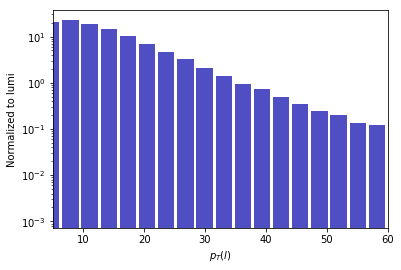

In [41]:
n, bins, patches = plt.hist(pTdata, bins=60, weights=weighted ,color='#0504aa',
                            alpha=0.7, rwidth=0.85)
#plt.grid(axis='y', alpha=0.75)

plt.xlim(5,60)
#plt.ylim(10**(-4),3*10**(-1))
plt.yscale("log")

plt.xlabel('$p_T(l)$')
plt.ylabel('Normalized to lumi')
#plt.text(23, 45, '$m_l=300,\ m_C=324,\ r=5\ 10^{-8}$')

#plt.savefig('ptl_300.png')

Text(0,0.5,'Normalized to 1')

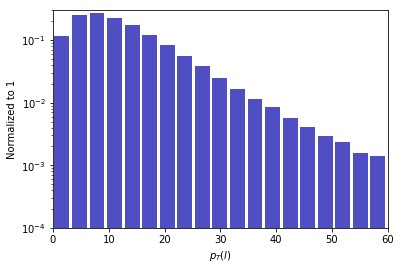

In [46]:
n, bins, patches = plt.hist(pTdata, bins=60, weights=weighted*crossSection ,color='#0504aa',
                            alpha=0.7, rwidth=0.85)
#plt.grid(axis='y', alpha=0.75)

plt.xlim(0,60)
plt.ylim(10**(-4),3*10**(-1))
plt.yscale("log")

plt.xlabel('$p_T(l)$')
plt.ylabel('Normalized to 1')
#plt.text(23, 45, '$m_l=300,\ m_C=324,\ r=5\ 10^{-8}$')

#plt.savefig('ptl_300.png')

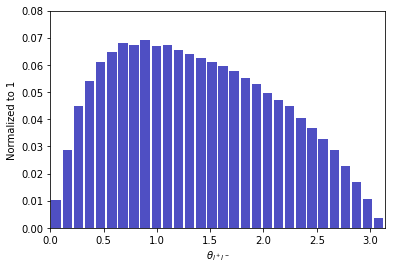

In [45]:
n, bins, patches = plt.hist(langledata, bins=30, weights=weighted*crossSection, density=False, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
#plt.grid(axis='y', alpha=0.75)

plt.xlim(0,np.pi)
plt.ylim(0,0.08)
#plt.yscale("log")

plt.xlabel('$\\theta_{l^+ l^-}$')
plt.ylabel('Normalized to 1')
#plt.text(23, 45, '$m_l=300,\ m_C=324,\ r=5\ 10^{-8}$')
plt.savefig('langle_300.png')

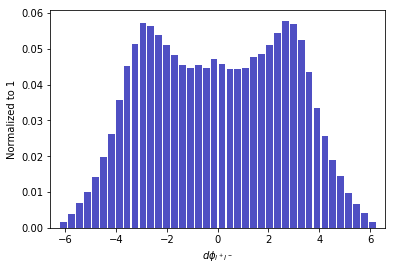

In [42]:
n, bins, patches = plt.hist(dphidata, bins=40,weights=weighted*crossSection, density=False, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
#plt.grid(axis='y', alpha=0.75)

plt.xlim(-2.1*np.pi,2.1*np.pi)
#plt.ylim(0,0.14)
#plt.yscale("log")

plt.xlabel('$d\\phi_{l^+ l^-}$')
plt.ylabel('Normalized to 1')
#plt.text(23, 45, '$m_l=300,\ m_C=324,\ r=5\ 10^{-8}$')
plt.savefig('dphi_300.png')

In [13]:
20/0.1

200.0

In [14]:
20000/100

200.0

In [16]:
0.06/0.0003

200.0

In [19]:
300*0.0118

3.54

In [20]:
700/3543

0.1975726785210274